# Google Job Recommendation

This project is using dataset from [**Google Job Skills**](https://www.kaggle.com/niyamatalmass/google-job-skills) provided by Kaggle. The dataset refers to the job posted in https://careers.google.com

Goal: Get **Top 5 Job Recommendations** | Scope: **Content-Based Filtering Method based on the Skills, Experiences, and Education**

## Content

This dataset is collected using Selenium by scraping all of the jobs text for [Google Career site](https://careers.google.com).

About the column
- Title: The title of the job

- Category: Category of the job

- Location: Location of the job

- Responsibilities: Responsibilities for the job

- Minimum Qualifications: Minimum Qualifications for the job

- Preferred Qualifications: Preferred Qualifications for the job

## Dataset Overlook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/job/job_skills.csv')
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [3]:
df.rename(columns={
    'Minimum Qualifications': 'Minimum_Qualifications',
    'Preferred Qualifications': 'Preferred_Qualifications'
}, inplace=True)

### Check NaN value, and drop it

In [4]:
df.isna().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
dtype: int64

In [5]:
df.dropna(inplace=True)

Look at the top rank of each column

In [6]:
df['Title'].value_counts()[0:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
Recruiter                                      7
Partner Sales Engineer, Google Cloud           7
User Experience Design Intern, Summer 2018     7
Name: Title, dtype: int64

In [7]:
df['Category'].value_counts()[0:10]

Sales & Account Management    168
Marketing & Communications    165
Finance                       115
Technical Solutions           100
Business Strategy              98
People Operations              86
User Experience & Design       84
Program Management             72
Partnerships                   59
Product & Customer Support     50
Name: Category, dtype: int64

In [8]:
df['Location'].value_counts()[:10]

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          70
London, United Kingdom               62
San Francisco, CA, United States     49
Singapore                            41
Tokyo, Japan                         31
Sydney, Australia                    31
San Bruno, CA, United States         28
Name: Location, dtype: int64

### Get the country value so it could be more general

In [9]:
df['Country'] = df['Location'].apply(lambda x : x.split(', ')[-1])
df['Country'].value_counts()[:10]

United States     624
Ireland            87
United Kingdom     62
Germany            53
Singapore          41
China              38
Australia          35
Japan              31
Taiwan             30
India              28
Name: Country, dtype: int64

### Remove the stopword and punctuation

In [10]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
def remove_sp(words): # snpl => stopword and punctiation
    word = word_tokenize(words)
    word = [i for i in word if i not in set(stopwords.words('english'))]
    word = [j for j in word if j not in string.punctuation]
    return ' '.join(word)

In [12]:
def get_year_of_exp(words):
    year = re.findall(r'([0-9]+) year', words)
    if not year:
        year.append(0)
    year = list(map(int, year))
    year = min(year)
    return year

In [13]:
columns=df.columns[4:7]
for column in columns:
    df[f'{column}_clean'] = df[column].apply(remove_sp)

In [14]:
df.to_csv('./dataset/job_skills_clean.csv')

In [15]:
df['min_year_experience'] = df['Minimum_Qualifications'].apply(get_year_of_exp)

In [17]:
df[['min_year_experience']].describe()

,min_year_experience
count,1235.000000
mean,2.780567
std,3.255158
min,0.000000
25%,0.000000
50%,2.000000
75%,5.000000
max,15.000000


## Data Visualization

Extract minimum degree requirement for each job title

In [16]:
degree = ['BA', 'BS', 'Bachelor', 'MBA', 'Master', 'PhD']
degree_dct={ key:value for (key,value) in zip(degree, [int(df['Minimum_Qualifications_clean'].str.contains(degree).sum()) for degree in degree])}
degree_dct

{'BA': 908, 'BS': 878, 'Bachelor': 164, 'MBA': 71, 'Master': 81, 'PhD': 8}

Text(0.5, 1.0, 'Degree vs Number of Job Vacancy')

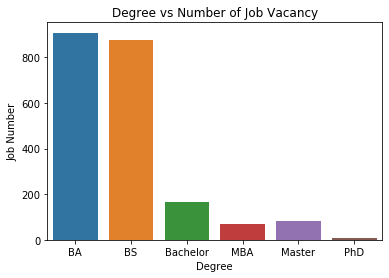

In [18]:
sns.barplot(x=list(degree_dct.keys()), y=list(degree_dct.values()))
plt.xlabel("Degree")
plt.ylabel("Job Number")
plt.title("Degree vs Number of Job Vacancy")

Minimum work experience

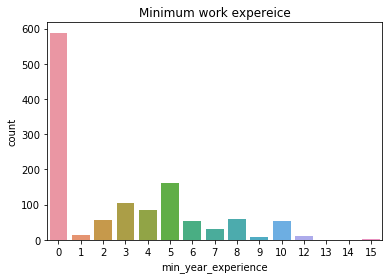

In [19]:
sns.countplot('min_year_experience', data=df)
plt.title("Minimum work expereice")
plt.show()

Popular programming language for position in google

In [20]:
programming_language=['JavaScript', 'Java ', 'PHP', "C+\+" , 'C ', 'Shell', 'Ruby', 'Kotlin', 'Go ', 'Perl', 'SQL','Python', 'R ']

pl_dct={ key:value for (key,value) in zip(programming_language, [int(df['Minimum_Qualifications_clean'].str.contains(pl).sum()) for pl in programming_language])}
srt_pl_dct = sorted(pl_dct.items(), key=lambda x: x[1], reverse=True)
srt_pl_dct

[('Python', 96),
 ('R ', 79),
 ('SQL', 75),
 ('JavaScript', 74),
 ('Java ', 70),
 ('C+\\+', 53),
 ('C ', 44),
 ('Go ', 24),
 ('Ruby', 14),
 ('PHP', 7),
 ('Perl', 6),
 ('Shell', 5),
 ('Kotlin', 3)]

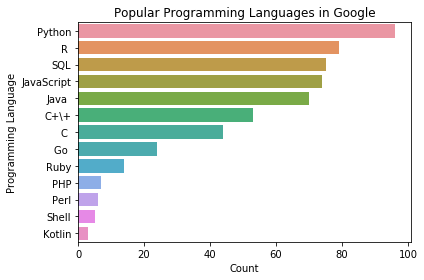

In [21]:
sns.barplot(y=[i[0] for i in srt_pl_dct], x=[i[1] for i in srt_pl_dct])
plt.xlabel("Count")
plt.ylabel("Programming Language")
plt.title("Popular Programming Languages in Google")
# plt.xticks(rotation=30)
plt.tight_layout()

In [23]:
print(df[df['Minimum_Qualifications_clean'].str.contains('Go')]['Minimum_Qualifications_clean'])

9       BA/BS degree Computer Science related Software...
17      BA/BS degree Computer Science related technica...
26      Bachelor 's degree Computer Science related te...
41      BA/BS degree Computer Science related Software...
48      BA/BS degree Computer Science related Software...
                              ...                        
1136    Be currently enrolled major university Colombi...
1143    Enrolled full time Bachelor 's Master 's progr...
1186    BA/BS degree equivalent practical experience E...
1191    Be currently enrolled major university Brazil ...
1213    Be currently enrolled major university Argenti...
Name: Minimum_Qualifications_clean, Length: 98, dtype: object


In [22]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from io import BytesIO
import requests

In [24]:
response = requests.get('http://jdhonline.weebly.com/uploads/7/3/9/8/7398917/239178562_orig.png')
# G = np.array(Image.open(BytesIO(response.content)))
G = np.array(Image.open('./image/Capture.PNG'))

In [25]:
# df for word contain Analyst
df_analyst = df.loc[df['Title'].str.contains('Data Analyst')]
analyst = ' '.join(df_analyst['Responsibilities'].tolist())

In [26]:
' '.join(df_analyst['Responsibilities'].tolist())

'Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects. Build and maintain the Support Operations Analytics infrastructure.\nCustomize and maintain tools to provide insights and visibility into key strategic and operational performance of the organization.\nDefine and action analysis on operational data sets to provide strategic recommendations to multiple levels of leadership; package analysis for reports and presentations to shape strategic and operational decisions.\nDraw insights from analyzing data to improve Support Operations quality and efficiency.\nContribute to strategic planning around product launches. Build and maintain the Support Operations Analytics infrastructure.\nCustomize and maintain tools to provide insights and visibility into key

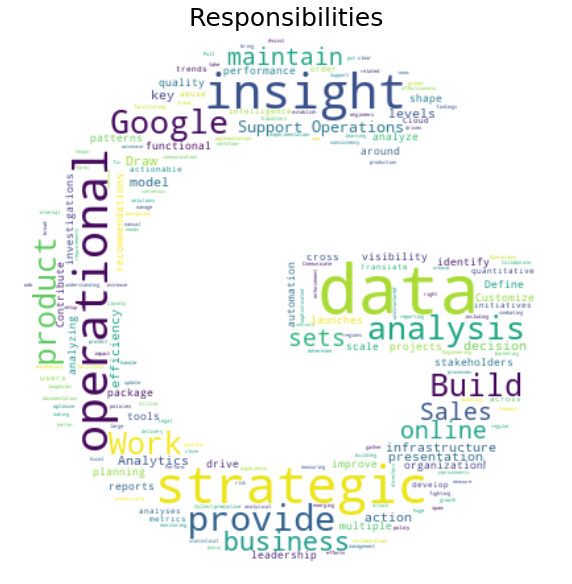

In [27]:
wordcloud = WordCloud(mask=G, background_color='white')
plt.figure(figsize=(10,15))
plt.imshow(wordcloud.generate(analyst), interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Responsibilities", size=25)
plt.show()

In [28]:
def plot_word_cloud(position, keyword):
    df_temp = df.loc[df['Title'].str.contains(position).fillna(False)]
    words = ' '.join(df_analyst[keyword].tolist())
    wordcloud = WordCloud(mask=G, background_color='white')
    plt.figure(figsize=(10,15))
    plt.imshow(wordcloud.generate(words), interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(keyword, size=25)
    plt.show()

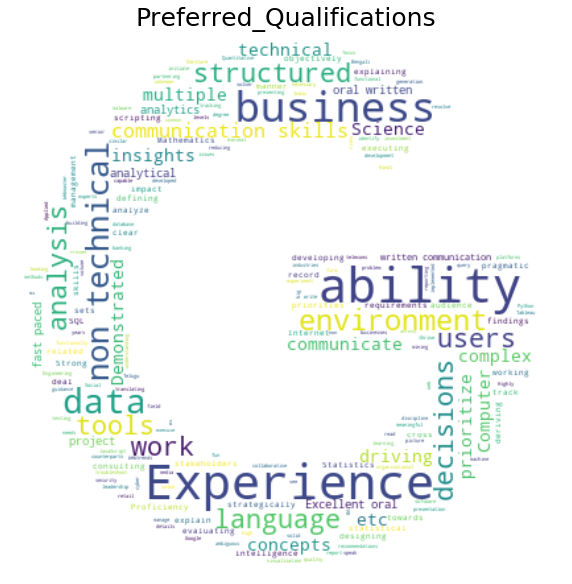

In [29]:
plot_word_cloud('Data Analyst','Preferred_Qualifications')

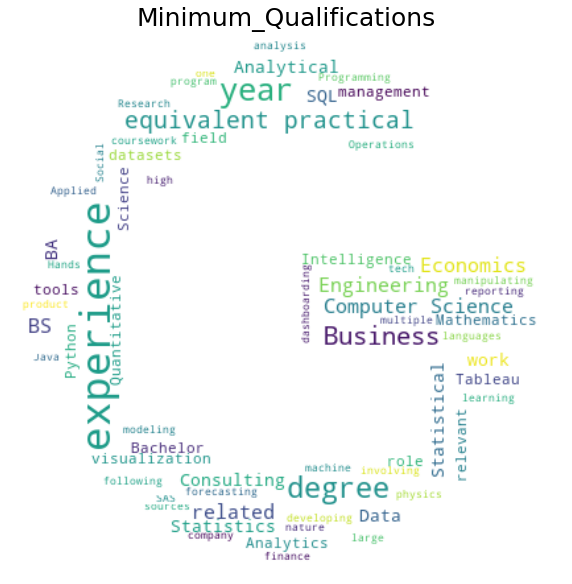

In [32]:
plot_word_cloud('Data Analyst','Minimum_Qualifications')

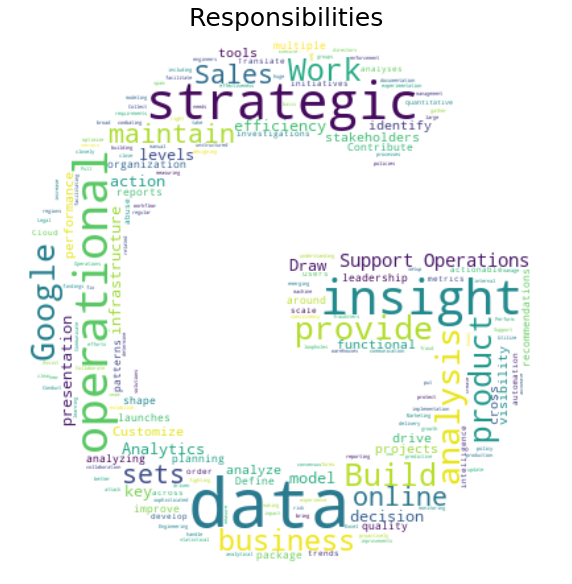

In [33]:
plot_word_cloud('Data Analyst','Responsibilities')